# 生データ観察と前処理

In [199]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo

In [200]:
main_color = '#5347dd'
sub_color = '#11e4ae'

## データ準備

In [201]:
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

display(X, y)
display(X.dtypes, y.dtypes)
print(f"X shape: {X.shape}, y shape: {y.shape}")

print(X.head().to_markdown())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

y    object
dtype: object

X shape: (45211, 16), y shape: (45211, 1)
|    |   age | job          | marital   | education   | default   |   balance | housing   | loan   |   contact |   day_of_week | month   |   duration |   campaign |   pdays |   previous |   poutcome |
|---:|------:|:-------------|:----------|:------------|:----------|----------:|:----------|:-------|----------:|--------------:|:--------|-----------:|-----------:|--------:|-----------:|-----------:|
|  0 |    58 | management   | married   | tertiary    | no        |      2143 | yes       | no     |       nan |             5 | may     |        261 |          1 |      -1 |          0 |        nan |
|  1 |    44 | technician   | single    | secondary   | no        |        29 | yes       | no     |       nan |             5 | may     |        151 |          1 |      -1 |          0 |        nan |
|  2 |    33 | entrepreneur | married   | secondary   | no        |         2 | yes       | yes    |       nan |             5 | may     |         76 |   

## 欠損値処理

In [202]:
print('-+'*25)
print(f"X null check: {X.isnull().sum()}")
print('-+'*25)
print(f"X null check: {X.isnull().sum() / X.isnull().count()}")
print('-+'*25)
print(f"y null check: {y.isnull().sum()}")

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
X null check: age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
X null check: age            0.000000
job            0.006370
marital        0.000000
education      0.041074
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
contact        0.287983
day_of_week    0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.817478
dtype: float64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
y null check: y    0
dtype: int64


In [203]:
print(X[['job', 'education']].isnull().any(axis=1).sum())
print(X[['job', 'education']].isnull().any(axis=1).sum() / X.isnull().any(axis=1).count())

2018
0.04463515516135454


In [204]:
print("unique jobs")
print(X.job.unique())
print()

print("unique marital")
print(X.marital.unique())
print()

print("unique education")
print(X.education.unique())
print()

print("unique contact")
print(X.contact.unique())
print()

print("unique pcoutcome")
print(X.poutcome.unique())
print()

unique jobs
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

unique marital
['married' 'single' 'divorced']

unique education
['tertiary' 'secondary' nan 'primary']

unique contact
[nan 'cellular' 'telephone']

unique pcoutcome
[nan 'failure' 'other' 'success']



In [205]:
df = X.join(y)

display(df.head())
print(df.shape)
print(df[['job', 'education']].isnull().sum())

df = df.loc[(df.job.notna()) & (df.education.notna())]
display(df.head())
print(df.shape)
print(df[['job', 'education']].isnull().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


(45211, 17)
job           288
education    1857
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no


(43193, 17)
job          0
education    0
dtype: int64


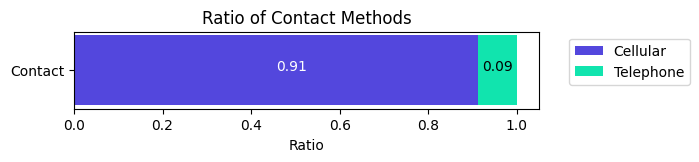

Contact null ratio: 0.00
Contact nonnull count: 30907


In [218]:
fig, ax = plt.subplots(figsize=(6, 1))

tmp = df.contact
contact_counts = tmp.value_counts(normalize=True)

ax.barh(['Contact'], [contact_counts['cellular']], color=main_color, label='Cellular')
ax.text(contact_counts['cellular']/2, 0, f"{contact_counts['cellular']:.2f}", color='white')
ax.barh(['Contact'], [contact_counts['telephone']], left=[contact_counts['cellular']], color=sub_color, label='Telephone')
ax.text(contact_counts['cellular']*1.01, 0, f"{contact_counts['telephone']:.2f}", color='black')

ax.set_xlabel('Ratio')
ax.set_title('Ratio of Contact Methods')
ax.legend(bbox_to_anchor=(1.05, 1))

plt.show()

diff = df.contact.isnull().count() - df.contact.isnull().sum()
ratio = df.contact.isnull().sum() / df.contact.isnull().count()
print(f"Contact null ratio: {ratio:.2f}")
print(f"Contact nonnull count: {diff}")

In [207]:
df = df.loc[(df.contact.notna())]
display(df.head())
print(df.shape)
print(df[['contact']].isnull().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,NaN,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,NaN,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,NaN,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,NaN,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,NaN,no


(30907, 17)
contact    0
dtype: int64


In [208]:
df.drop(columns='poutcome', inplace=True)

In [209]:
display(df)
print(df.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


(30907, 16)


## 異常値処理

In [210]:
tmp = df.describe(include='all')
display(tmp)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
count,30907.000000,30907,30907,30907,30907,30907.000000,30907,30907,30907,30907.000000,30907,30907.000000,30907.000000,30907.000000,30907.000000,30907
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,no
freq,NaN,7329,18379,16004,30397,NaN,15564,25787,28213,NaN,6336,NaN,NaN,NaN,NaN,26394
mean,40.918918,NaN,NaN,NaN,NaN,1425.760701,NaN,NaN,NaN,15.967257,NaN,260.485003,2.751318,55.944835,0.808490,NaN
std,10.922583,NaN,NaN,NaN,NaN,3190.967030,NaN,NaN,NaN,8.226736,NaN,257.783963,2.954412,112.726930,2.706169,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,NaN,16.000000,NaN,181.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1502.500000,NaN,NaN,NaN,21.000000,NaN,322.000000,3.000000,10.000000,1.000000,NaN


In [211]:
df[['balance', 'pdays']].describe(include='all')

,balance,pdays
count,30907.000000,30907.000000
mean,1425.760701,55.944835
std,3190.967030,112.726930
min,-8019.000000,-1.000000
25%,80.000000,-1.000000
50%,473.000000,-1.000000
75%,1502.500000,10.000000
max,102127.000000,871.000000


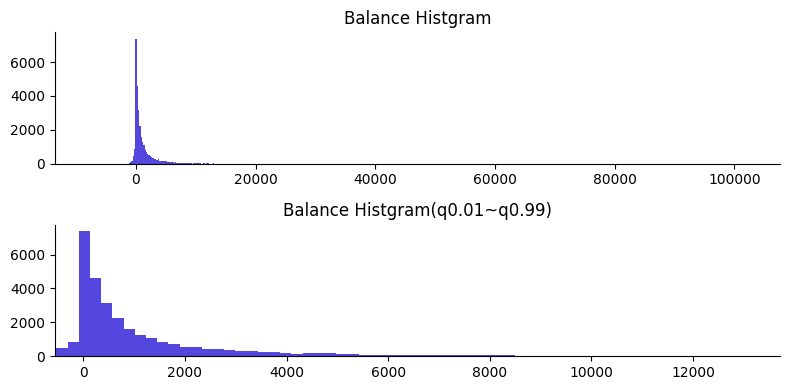

In [212]:
fig, axes = plt.subplots(figsize=(8, 4), nrows=2)

ax0, ax1 = axes
tmp = df['balance']

ax0.hist(tmp, bins=500, color=main_color)
ax0.set_title('Balance Histgram')
ax0.spines[['right', 'top']].set_visible(False)

ax1.hist(tmp, bins=500, color=main_color)
ax1.set_xlim(np.nanquantile(tmp, q=0.01), np.nanquantile(tmp, q=0.99))
ax1.set_title('Balance Histgram(q0.01~q0.99)')
ax1.spines[['right', 'top']].set_visible(False)


plt.tight_layout()

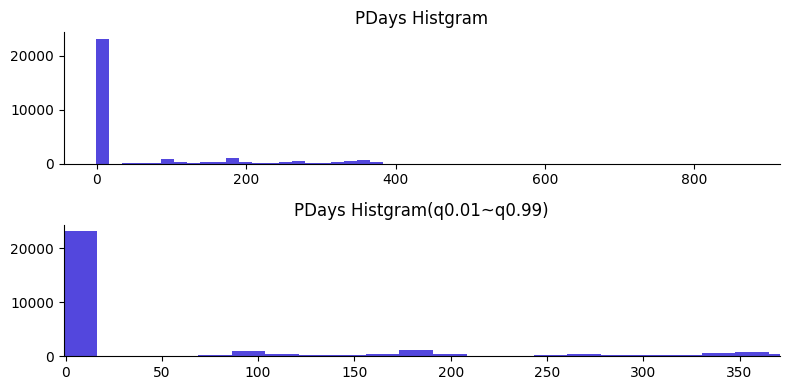

In [213]:
fig, axes = plt.subplots(figsize=(8, 4), nrows=2)

ax0, ax1 = axes
tmp = df['pdays']

ax0.hist(tmp, bins=50, color=main_color)
ax0.set_title('PDays Histgram')
ax0.spines[['right', 'top']].set_visible(False)

ax1.hist(tmp, bins=50, color=main_color)
ax1.set_xlim(np.nanquantile(tmp, q=0.01), np.nanquantile(tmp, q=0.99))
ax1.set_title('PDays Histgram(q0.01~q0.99)')
ax1.spines[['right', 'top']].set_visible(False)


plt.tight_layout()

In [214]:
df['saving'] = np.where(df['balance'] >= 0, df['balance'], np.nan)
df['debt'] = np.where(df['balance'] < 0, df['balance'], np.nan)

In [215]:
df.to_csv('../datasets/preprocessed_data.csv', index=False)
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y,saving,debt
count,30907.000000,30907,30907,30907,30907,30907.000000,30907,30907,30907,30907.000000,30907,30907.000000,30907.000000,30907.000000,30907.000000,30907,28683.000000,2224.000000
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,no,NaN,NaN
freq,NaN,7329,18379,16004,30397,NaN,15564,25787,28213,NaN,6336,NaN,NaN,NaN,NaN,26394,NaN,NaN
mean,40.918918,NaN,NaN,NaN,NaN,1425.760701,NaN,NaN,NaN,15.967257,NaN,260.485003,2.751318,55.944835,0.808490,NaN,1560.796256,-315.797212
std,10.922583,NaN,NaN,NaN,NaN,3190.967030,NaN,NaN,NaN,8.226736,NaN,257.783963,2.954412,112.726930,2.706169,NaN,3272.041883,395.596465
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.000000,-8019.000000
25%,32.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,145.000000,-413.250000
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,NaN,16.000000,NaN,181.000000,2.000000,-1.000000,0.000000,NaN,553.000000,-225.000000
75%,48.000000,NaN,NaN,NaN,NaN,1502.500000,NaN,NaN,NaN,21.000000,NaN,322.000000,3.000000,10.000000,1.000000,NaN,1637.000000,-90.000000
